In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the data

In [2]:
INPUT_CSV_PATH = "../data/1720579019/game_results.csv"
INPUT_LOG_DIR = "../logs/1720579019/"

#### 1.1 Load log data

In [3]:
# read the first log file
all_log_files = glob.glob(INPUT_LOG_DIR + "/*.log")
log_file = all_log_files[0]
with open(log_file, 'r') as f:
    log_data = f.readlines()
models_line = [line for line in log_data if 'Models:' in line][0]
model_a, model_b = models_line.split('Models: ')[1].split('vs')
model_a, model_b = model_a.strip(), model_b.strip()
print(f"Model A: {model_a}")
print(f"Model B: {model_b}")

animal_counts = {}
for log_file in all_log_files:
    with open(log_file, 'r') as f:
        log_lines = f.readlines()
        for line in log_lines:
            exp_line_split = line.split("run_experiment:116 - ")
            if len(exp_line_split) > 1:
                log_text_split = exp_line_split[1].split("  ")
                animal = log_text_split[1].strip()
                animal_counts[animal] = animal_counts.get(animal, 0) + 1
df_animals = pd.DataFrame(list(animal_counts.items()), columns=['animal', 'count'])
# print(df_animals.columns)
df_animals

Model A: gemma2:9b-instruct-q8_0
Model B: llama3:8b-instruct-q8_0


,animal,count
0,Elephant,6301
1,Tapir,1937
2,Rhino,1020
3,Ostrich,2724
4,Horse,984
...,...,...
154,Disqualified repeating an animal.,4
155,Antlered,5
156,Swallow,1
157,Wolverine,1


#### 1.2 Load game results

In [4]:
df = pd.read_csv(INPUT_CSV_PATH)

# replace 'Model A' and 'Model B' with the actual model names
df['winner'] = df['winner'].replace('Model A', model_a)
df['winner'] = df['winner'].replace('Model B', model_b)

# Filter no winner
df = df[df['winner'] != 'No winner']

df

,experiment_number,winner,reason
0,1,llama3:8b-instruct-q8_0,A disqualified: Disqualified repeated animal.
1,2,llama3:8b-instruct-q8_0,A forfeited
2,3,gemma2:9b-instruct-q8_0,B disqualified: Nocturnal Disqualified [Anima...
3,4,llama3:8b-instruct-q8_0,A disqualified: Disqualified repeating an animal.
4,5,gemma2:9b-instruct-q8_0,B disqualified: Antlered disqualified [Repeat...
...,...,...,...
95,96,llama3:8b-instruct-q8_0,A disqualified: Disqualified Previous animal a...
96,97,llama3:8b-instruct-q8_0,A disqualified: Disqualified repeat animal.
97,98,llama3:8b-instruct-q8_0,A response too long (so not an animal)
98,99,llama3:8b-instruct-q8_0,A response too long (so not an animal)


### 2. Plot data

#### 2.1 Plot winners

Text(0.5, 1.0, 'Number of wins in Animal Word Game')

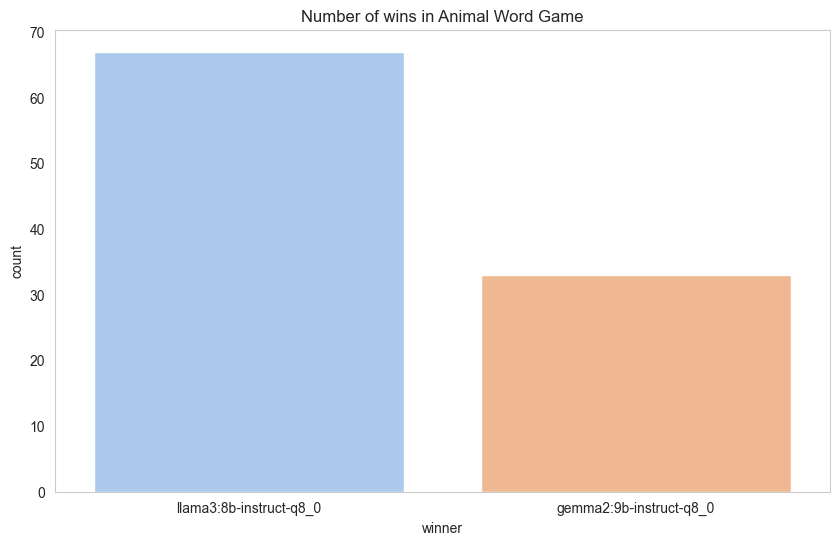

In [5]:
sns.set_palette("pastel")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='winner', hue='winner')
plt.title(f"Number of wins in Animal Word Game")

#### 2.2 Plot animals

<Axes: xlabel='animal', ylabel='count'>

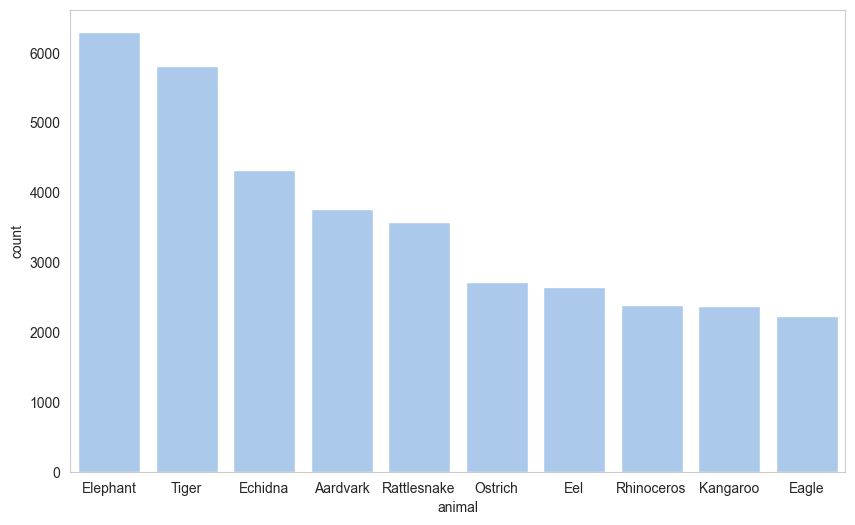

In [6]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
df_animal_top10 = df_animals.sort_values(by='count', ascending=False).head(10)
sns.barplot(data=df_animal_top10, x='animal', y='count')

#### 2.3 Count the reasons

Text(0.5, 1.0, 'Reasons for game endings')

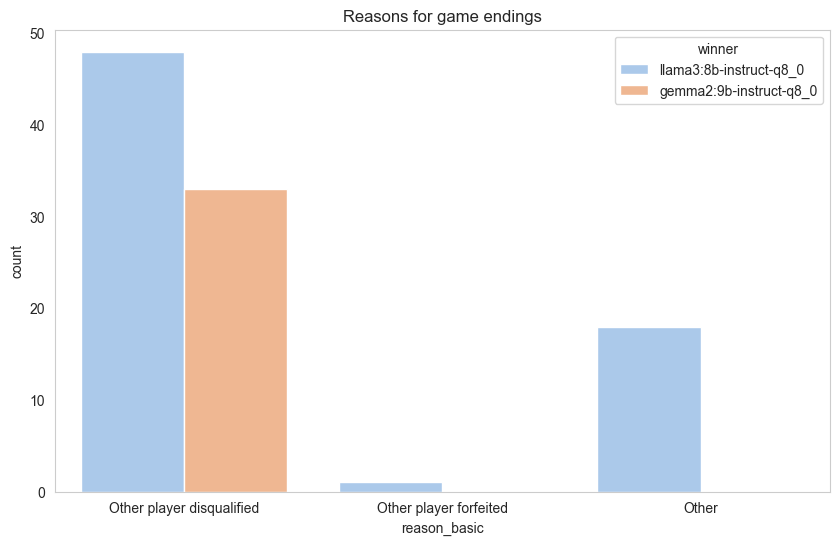

In [9]:
def get_basic_reason(reason_str):
    if "forfeit" in reason_str.lower():
        return "Other player forfeited"
    elif "disqualified" in reason_str.lower():
        return "Other player disqualified"
    elif "no conclusion" in reason_str.lower():
        return "No conclusion"
    else:
        return "Other"

df['reason_basic'] = df['reason'].apply(get_basic_reason)

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reason_basic', hue="winner")
plt.title(f"Reasons for game endings")

In [8]:
# count percentage of forfeit
total_games = df.shape[0]
forfeit_games = df[df['reason_basic'] == 'forfeit'].shape[0]
print(f"Percentage of forfeit games: {forfeit_games / total_games * 100:.2f}%")

Percentage of forfeit games: 1.00%
